# Matchers notebook

In [13]:
import psycopg2

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from dotenv import load_dotenv
load_dotenv();

In [16]:
conn = psycopg2.connect( host= os.environ.get('DB_HOST'),
                         database= os.environ.get('DB_NAME'), 
                        user= os.environ.get('DB_USER'), 
                        password= os.environ.get('DB_PASSWORD'), 
                        port= os.environ.get('DB_PORT'))

cursor = conn.cursor()
progression_table = pd.read_sql_query('select * from progression_data',con=conn)
progression_table.sort_values(by='timestamp',inplace=True,ascending=False)

# Percent of users left the first level

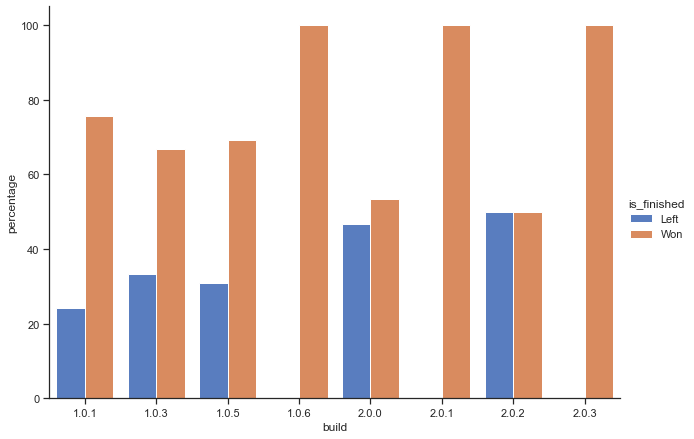

In [74]:
bulid_finished_first = progression_table[progression_table.level_index == 0].groupby(['build', 'is_finished']).agg({'user_id':'count'})
build_first = progression_table[progression_table.level_index == 0].groupby('build').agg({'user_id': 'count'})
build_finished_percent_first = (bulid_finished_first.div(build_first, level='build') * 100).reset_index().rename(columns={'user_id':'percentage'}).sort_values(by='build',ascending=True)
build_finished_percent_first = build_finished_percent_first[build_finished_percent_first.build != ""]
# sns.set(rc={'figure.figsize':(100,8.27)})
ax = sns.catplot(x="build", y="percentage", hue="is_finished", kind="bar",
 data=build_finished_percent_first,height=6.27, aspect=11.7/8.27, palette="muted")